In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime, date, time, timedelta
from dateutil.relativedelta import relativedelta
from scipy.interpolate import CubicSpline
from scipy.optimize import least_squares

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize'] = 15, 10

In [ ]:
data = pd.read_excel('hw1_q2.xlsx')
data

,Time to Maturity,Yield Rate
0,0.25,0.0150
1,0.50,0.0160
2,1.00,0.0180
3,2.00,0.0210
4,3.00,0.0240
5,5.00,0.0330
6,7.00,0.0374
7,10.00,0.0405
8,20.00,0.0435


In [ ]:
time_T = data["Time to Maturity"]
yields = data["Yield Rate"]

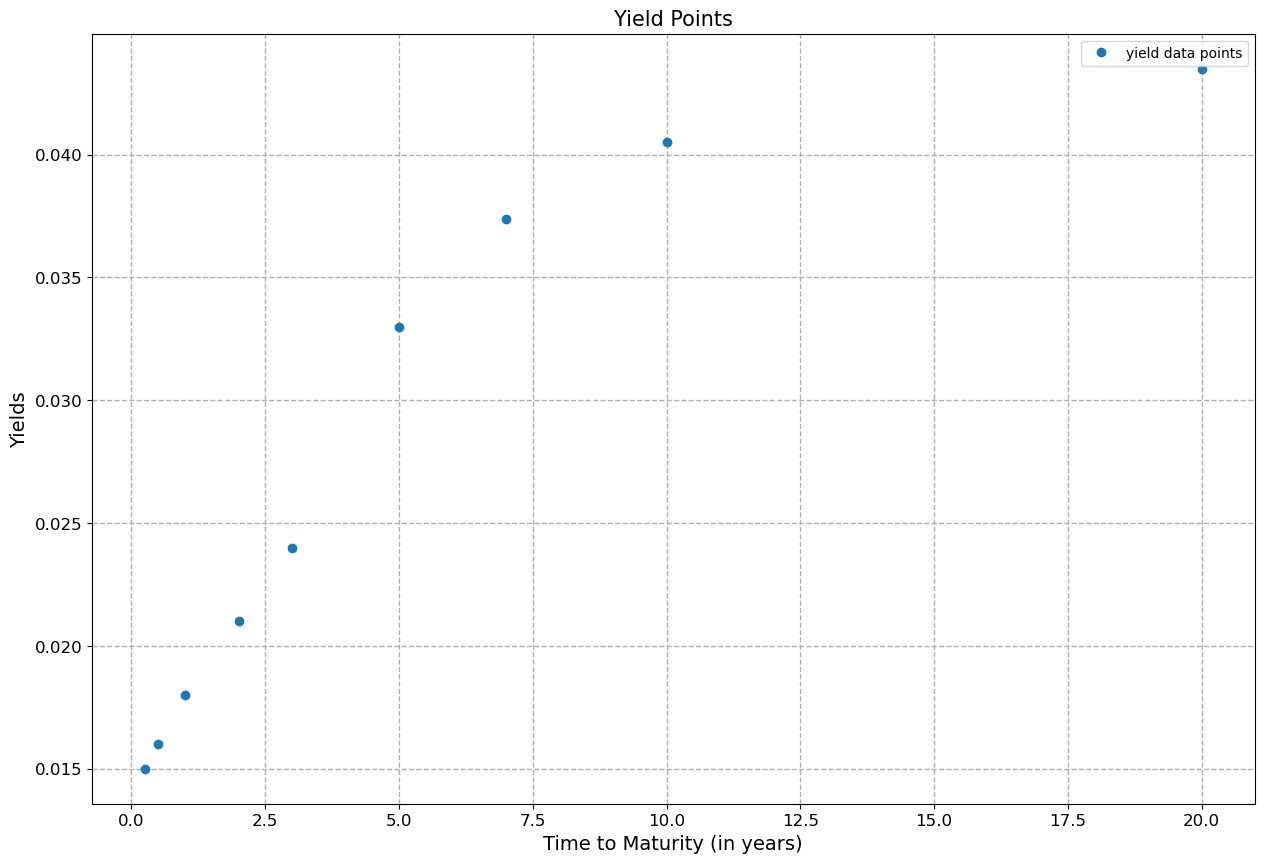

In [ ]:
plt.xlabel('Time to Maturity (in years)')
plt.ylabel('Yields')
plt.plot(time_T, yields, 'o', label = 'yield data points')
plt.title('Yield Points', fontsize = 15)
plt.legend()
plt.grid(linestyle = '--', linewidth = 1)

In [ ]:
cs = CubicSpline(time_T, yields)
curve_points = np.linspace(min(time_T), max(time_T), 1000)

In [ ]:
year_4 = 4
yield_at_4 = cs(year_4)
yield_at_4

array(0.02849571)

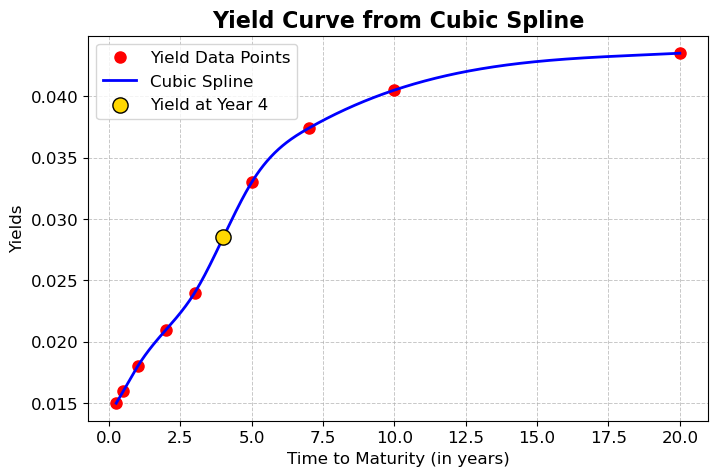

In [ ]:
plt.figure(figsize=(8, 5))
plt.title('Yield Curve from Cubic Spline', fontsize=16, fontweight='bold')
plt.xlabel('Time to Maturity (in years)', fontsize=12)
plt.ylabel('Yields', fontsize=12)
plt.plot(time_T, yields, 'o', label='Yield Data Points', markersize=8, color='red')
plt.plot(curve_points, cs(curve_points), label="Cubic Spline", linewidth=2, color='blue')

plt.scatter(year_4, yield_at_4, color='gold', edgecolors='black', s=120, label='Yield at Year 4', zorder=3)
plt.grid(linestyle='--', linewidth=0.7, alpha=0.7)
plt.legend(fontsize=12)

plt.show()

In [ ]:
print(f"The yield rate for T = 4 years is: {yield_at_4:.4f}")

The yield rate for T = 4 years is: 0.0285


In [ ]:
# Extract the coefficients
coefficients = cs.c

# Print the coefficients for each segment
for i, (a0, a1, a2, a3) in enumerate(coefficients.T):
    print(f"Segment {i+1}: a = {a0:.6f}, b = {a1:.6f}, c = {a2:.6f}, d = {a3:.6f}")

Segment 1: a = -0.000821, b = 0.000821, c = 0.003846, d = 0.015000
Segment 2: a = -0.000821, b = 0.000205, c = 0.004103, d = 0.016000
Segment 3: a = 0.000333, b = -0.001026, c = 0.003692, d = 0.018000
Segment 4: a = 0.000384, b = -0.000025, c = 0.002641, d = 0.021000
Segment 5: a = -0.000374, b = 0.001127, c = 0.003743, d = 0.024000
Segment 6: a = 0.000169, b = -0.001118, c = 0.003760, d = 0.033000
Segment 7: a = 0.000003, b = -0.000103, c = 0.001317, d = 0.037400
Segment 8: a = 0.000003, b = -0.000077, c = 0.000776, d = 0.040500
